In [25]:
import pandas as pd
import numpy as np
import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('conversion.csv')

In [3]:
# check missing values
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [4]:
# check size
df.shape

(1143, 11)

In [5]:
# check types
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
# check main metrics
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
# check head
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
# How many unique advertising campaigns have been run?
df.xyz_campaign_id.nunique()

3

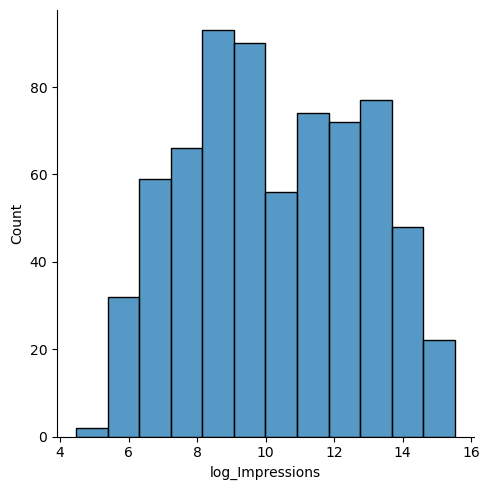

In [9]:
# Plot the distribution of the impressions number for each advertising campaign
impressions_by_campaign = df.groupby('fb_campaign_id', as_index=False).agg({'Impressions': 'sum'})
impressions_by_campaign['log_Impressions'] = np.log(impressions_by_campaign.Impressions)
sns.displot(data=impressions_by_campaign, x="log_Impressions")
plt.show()

In [12]:
# Calculate CTR
df['CTR'] = df.Clicks / df.Impressions
# Find smallest value
df.sort_values('CTR', ascending=False)[['ad_id', 'CTR']].head()

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531


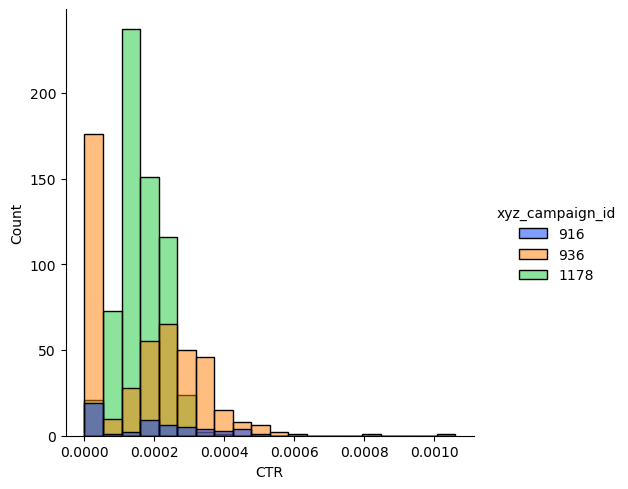

In [22]:
# Plot distrubution by campaign
sns.displot(data=df, x="CTR", hue="xyz_campaign_id", bins=20, palette=sns.color_palette('bright')[:3])

In [24]:
# cost-per-click calculation
df['CPC'] = df.Spent / df.Clicks
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [29]:
np.round(ss.iqr(df.CPC, nan_policy='omit'), 2)

0.25

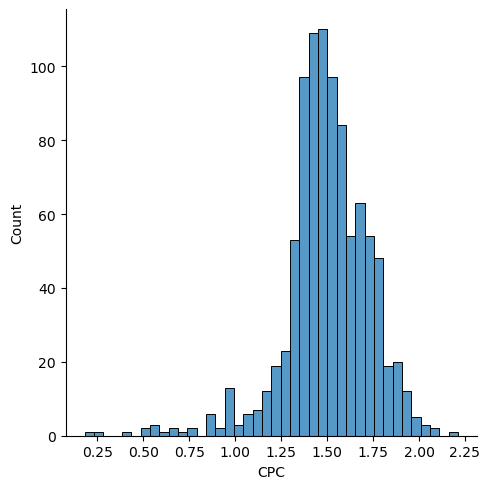

In [30]:
# plot CPC distribution
sns.displot(df.CPC.dropna())